第 05 周作业
- 姓名:童俊烨
- 学号:2021210212036

内容: 第五章实训题1

请
- 先将此文件更名为 <font color='red'>DM05-姓名-学号.ipynb</font> , 然后在此答题, 
- 完成后再提交此文件.

# 实训1 

使用分类算法实现客户流失预测.

具体思路及步骤
- (1) 划分训练数据和测试数据
- (2) 建立决策树模型分类器
- (3) 对分类器进行训练
- (4) 采用训练后的模型分类器对客户是否会流失进行预测
- (5) 画出分类器的树形图形

# (1) 划分训练数据和测试数据

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
data = pd.read_csv('communication.csv')
data

,age,educational level,months,electronic payment,type
0,44,4,13,0,1
1,33,5,11,0,1
2,52,1,68,0,0
3,33,2,33,0,1
4,30,1,23,0,0
...,...,...,...,...,...
995,39,3,10,1,0
996,34,5,7,0,0
997,59,5,67,1,0
998,49,2,70,0,0


In [4]:
data.head()

,age,educational level,months,electronic payment,type
0,44,4,13,0,1
1,33,5,11,0,1
2,52,1,68,0,0
3,33,2,33,0,1
4,30,1,23,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 1000 non-null   int64
 1   educational level   1000 non-null   int64
 2   months              1000 non-null   int64
 3   electronic payment  1000 non-null   int64
 4   type                1000 non-null   int64
dtypes: int64(5)
memory usage: 39.2 KB


In [6]:
data.describe()

,age,educational level,months,electronic payment,type
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.684000,2.671000,35.526000,0.371000,0.274000
std,12.558816,1.222397,21.359812,0.483314,0.446232
min,18.000000,1.000000,1.000000,0.000000,0.000000
25%,32.000000,2.000000,17.000000,0.000000,0.000000
50%,40.000000,3.000000,34.000000,0.000000,0.000000
75%,51.000000,4.000000,54.000000,1.000000,1.000000
max,77.000000,5.000000,72.000000,1.000000,1.000000


In [7]:
from sklearn.model_selection import train_test_splitt
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42) # 20% are test_set

In [8]:
train_set

,age,educational level,months,electronic payment,type
29,33,4,13,1,0
535,34,4,31,0,0
695,75,1,72,0,0
557,23,2,10,0,0
836,59,3,72,0,0
...,...,...,...,...,...
106,61,2,35,0,0
270,25,1,39,0,0
860,40,4,20,1,0
435,30,5,45,1,1


In [9]:
test_set

,age,educational level,months,electronic payment,type
521,41,2,48,0,0
737,38,5,15,0,1
740,29,3,34,1,0
660,54,3,45,0,0
411,31,3,5,1,1
...,...,...,...,...,...
408,34,3,39,0,0
332,45,1,26,0,0
208,64,4,72,0,0
613,52,3,68,0,0


In [31]:
X_train = train_set.iloc[:, 0:-1]
X_train

,age,educational level,months,electronic payment
29,33,4,13,1
535,34,4,31,0
695,75,1,72,0
557,23,2,10,0
836,59,3,72,0
...,...,...,...,...
106,61,2,35,0
270,25,1,39,0
860,40,4,20,1
435,30,5,45,1


In [32]:
X_test = train_set.iloc[:, 0:-1]
X_test

,age,educational level,months,electronic payment
29,33,4,13,1
535,34,4,31,0
695,75,1,72,0
557,23,2,10,0
836,59,3,72,0
...,...,...,...,...
106,61,2,35,0
270,25,1,39,0
860,40,4,20,1
435,30,5,45,1


In [36]:
Y_train = train_set.iloc[:, -1]
Y_train

29     0
535    0
695    0
557    0
836    0
      ..
106    0
270    0
860    0
435    1
102    1
Name: type, Length: 800, dtype: int64

In [37]:
Y_test = test_set.iloc[:, -1]
Y_test

521    0
737    1
740    0
660    0
411    1
      ..
408    0
332    0
208    0
613    0
78     0
Name: type, Length: 200, dtype: int64

# (2) 建立决策树模型分类器

In [59]:
# 导入第三方模块
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# 预设各参数的不同选项值
max_depth = [2,3,4,5,6]
min_samples_split = [2,4,6,8]
min_samples_leaf = [2,4,8,10,12]

# 将各参数值以字典形式组织起来
parameters = {'max_depth':max_depth, 
              'min_samples_split':min_samples_split, 
              'min_samples_leaf':min_samples_leaf}

# triple for loop to try out the best estimator

# 网格搜索法，测试不同的参数值
grid_search = GridSearchCV(estimator = DecisionTreeClassifier(criterion='entropy'), 
                            param_grid = parameters, cv=10)

# 模型拟合
grid_search.fit(X_train, Y_train)

# 返回最佳组合的参数值
grid_search.best_params_

{'max_depth': 4, 'min_samples_leaf': 12, 'min_samples_split': 2}

In [61]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=12)

In [63]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='entropy', **grid_dtcateg.best_params_)
tree_clf.fit(X_train, Y_train) # use X and y(real class) to generate a model

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=12,
                       min_samples_split=4)

# (3) 对分类器进行训练

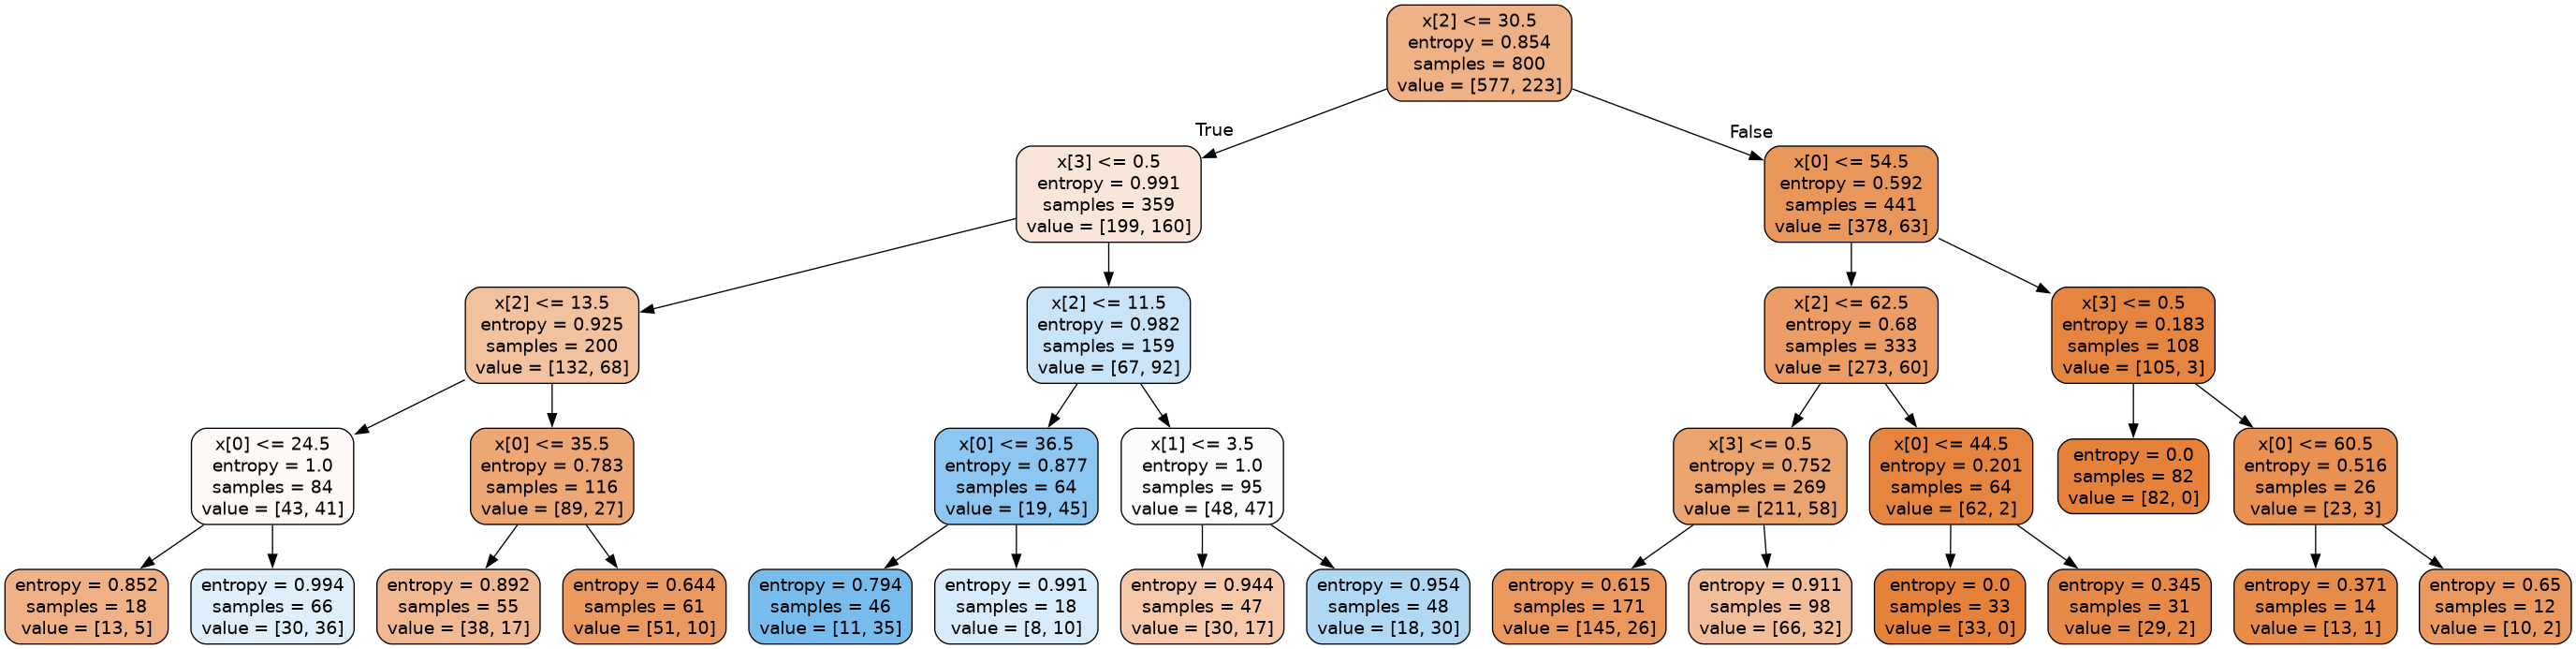

In [65]:
# draw decision tree
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="decision_tree.dot",
    rounded=True,
    filled=True
)

# $ dot -Tpng iris_tree.dot iris_tree.png
from PIL import Image
from IPython.display import display

# Open the PNG file
image_path = 'decision_tree.png'
img = Image.open(image_path)

# Convert the image to RGB mode if it's in RGBA mode
if img.mode == 'RGBA':
    img = img.convert('RGB')

# Display the image
display(img)


# (4) 采用训练后的模型分类器对客户是否会流失进行预测

In [67]:
tree_clf.predict_proba(X_test)

array([[0.375     , 0.625     ],
       [0.84795322, 0.15204678],
       [1.        , 0.        ],
       ...,
       [0.375     , 0.625     ],
       [0.67346939, 0.32653061],
       [0.72222222, 0.27777778]])

In [68]:
tree_clf.predict(X_test)

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [73]:
res = tree_clf.predict(X_test)
array_1 = [] # 储存不会流失的用户index
array_2 = [] # 储存会流失的用户index
for i in range(0, len(res)):
    if res[i] == 0:
        array_1.append(i)
    elif res[i] == 1:
        array_2.append(i)


In [75]:
len(array_1)

622

In [76]:
len(array_2)

178

In [77]:
array_1

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 25,
 26,
 27,
 28,
 29,
 30,
 32,
 33,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 61,
 62,
 64,
 65,
 66,
 68,
 71,
 74,
 75,
 76,
 77,
 79,
 80,
 81,
 82,
 83,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 98,
 99,
 100,
 101,
 103,
 105,
 106,
 108,
 109,
 110,
 112,
 113,
 114,
 115,
 117,
 118,
 119,
 121,
 122,
 123,
 125,
 128,
 129,
 130,
 131,
 133,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 149,
 151,
 152,
 154,
 156,
 157,
 161,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 174,
 175,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 185,
 186,
 187,
 188,
 190,
 191,
 192,
 194,
 195,
 196,
 199,
 200,
 201,
 202,
 204,
 205,
 206,
 208,
 213,
 214,
 215,
 216,
 217,
 219,
 220,
 221,
 222,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235

# (5) 画出分类器的树形图形

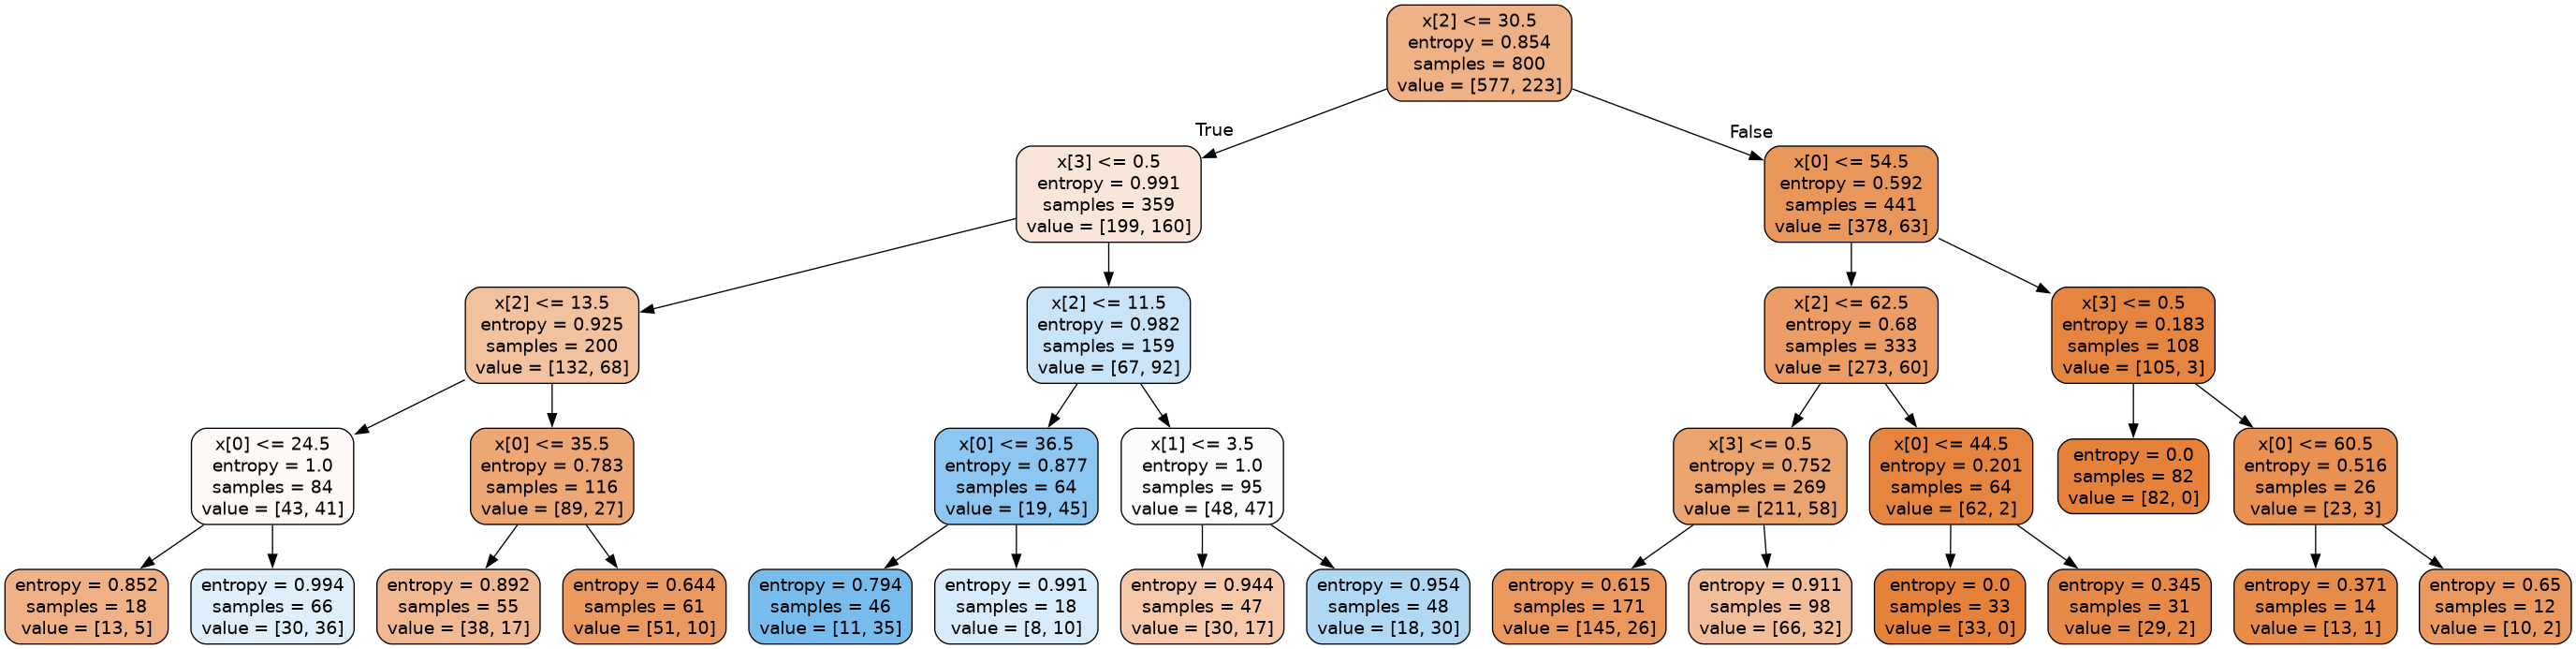

In [78]:
# draw decision tree
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="decision_tree.dot",
    rounded=True,
    filled=True
)

# $ dot -Tpng iris_tree.dot iris_tree.png
from PIL import Image
from IPython.display import display

# Open the PNG file
image_path = 'decision_tree.png'
img = Image.open(image_path)

# Convert the image to RGB mode if it's in RGBA mode
if img.mode == 'RGBA':
    img = img.convert('RGB')

# Display the image
display(img)